<a href="https://colab.research.google.com/github/Pallavi-21ada40/Speech-Emotion-recognition-using-RNN/blob/main/speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importig Required Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

Using API key Method to Load the Data

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od


In [ ]:
data=od.download("https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess",force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        if len(paths) == 2800:
          break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

5600

In [ ]:
len(labels)

5600

In [ ]:
paths[:5]

['/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_neat_ps.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_life_ps.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_hurl_ps.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_burn_ps.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_knock_ps.wav']

In [ ]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

DataFrame

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/toronto-emotional-speech-set-tess/tes...,ps
1,/content/toronto-emotional-speech-set-tess/tes...,ps
2,/content/toronto-emotional-speech-set-tess/tes...,ps
3,/content/toronto-emotional-speech-set-tess/tes...,ps
4,/content/toronto-emotional-speech-set-tess/tes...,ps


In [ ]:
df['label'].value_counts()

ps         800
neutral    800
fear       800
disgust    800
sad        800
angry      800
happy      800
Name: label, dtype: int64

Exploratory Data Analysis

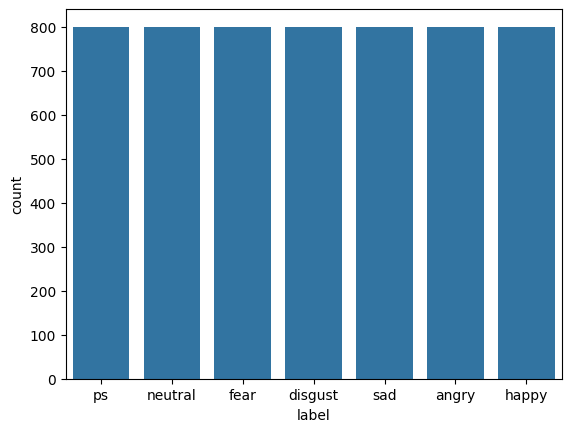

In [ ]:
sns.countplot(data=df, x='label')
plt.show()

In [ ]:


def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

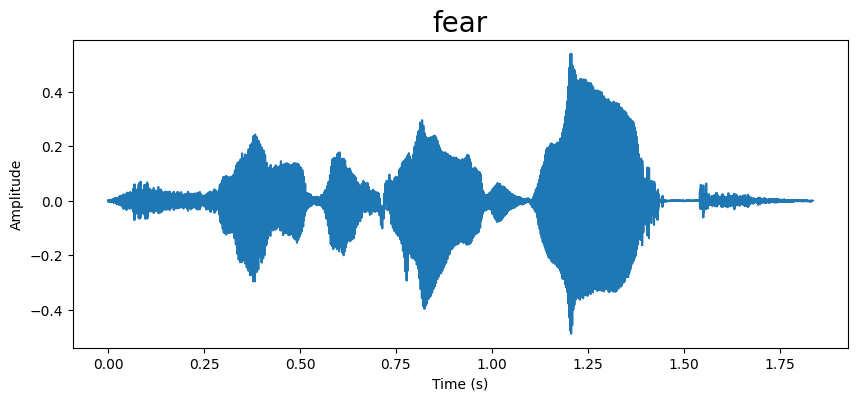

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(np.linspace(0, len(data) / sr, num=len(data)), data)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Example usage:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)

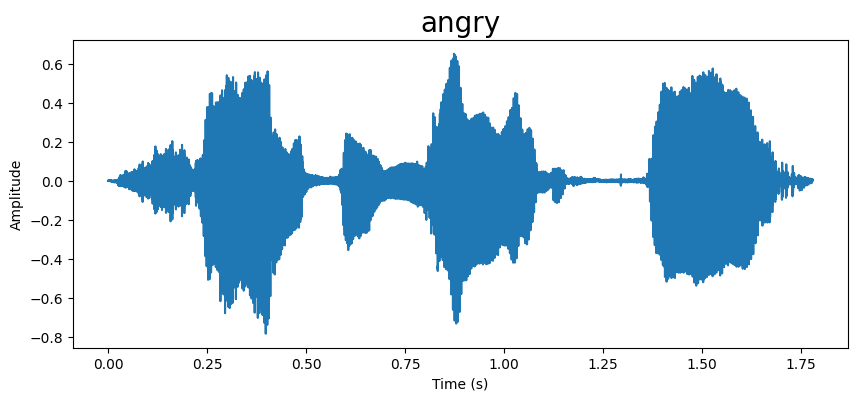

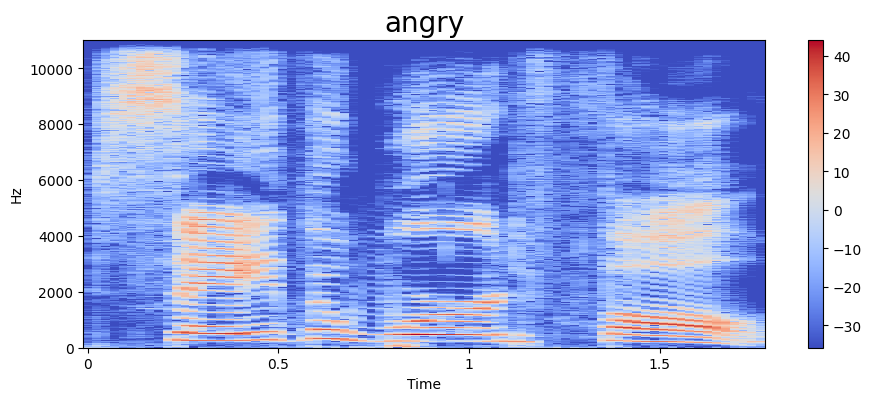

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

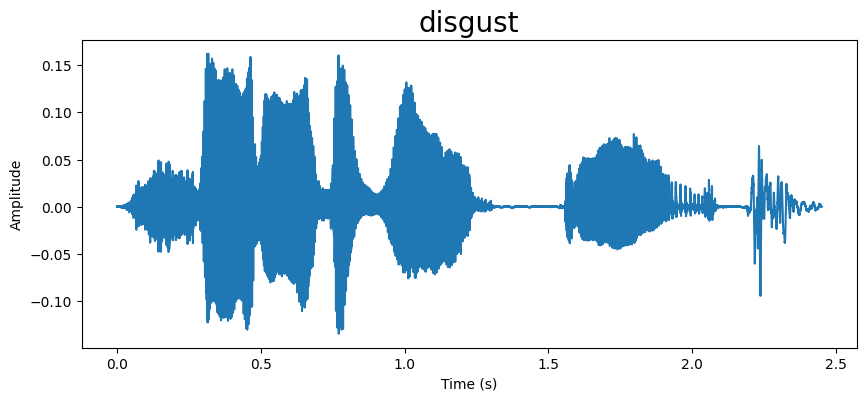

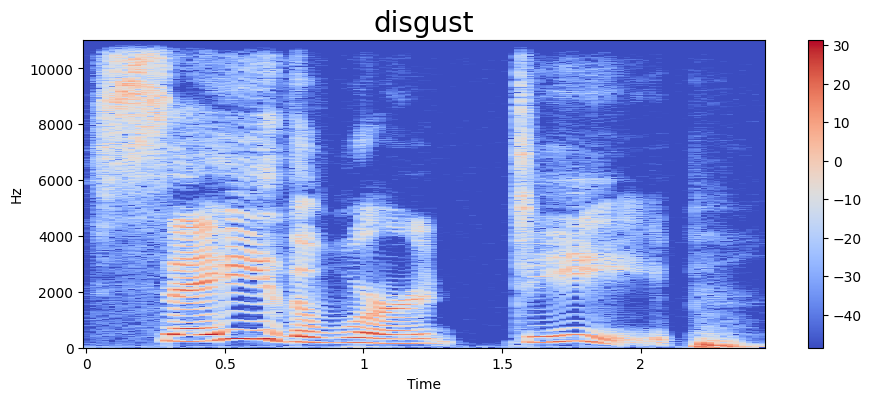

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

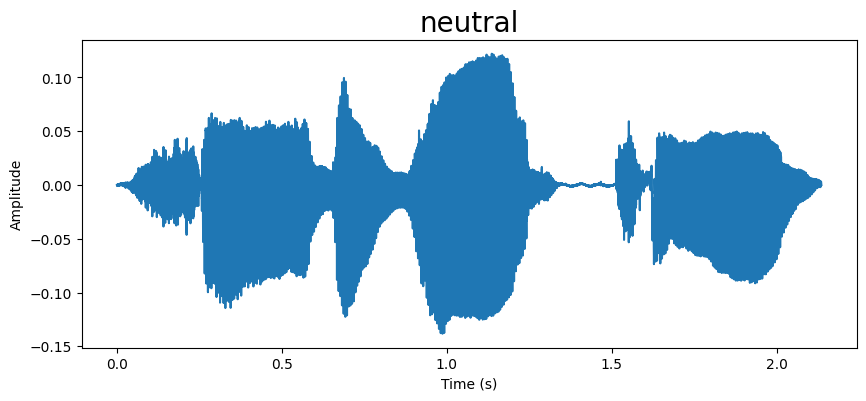

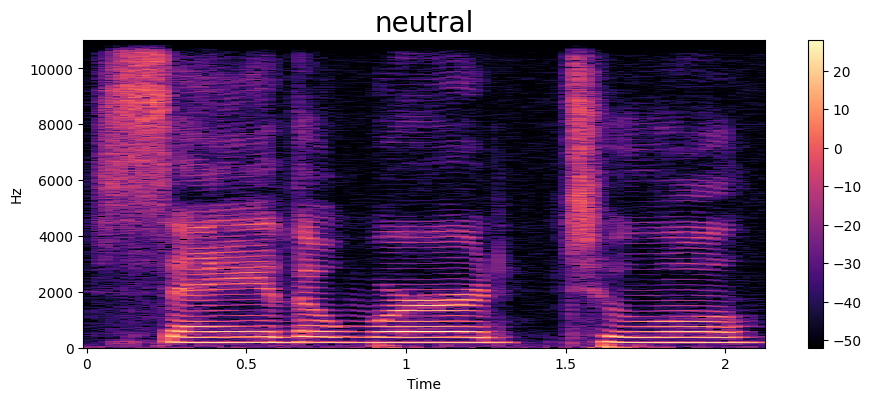

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

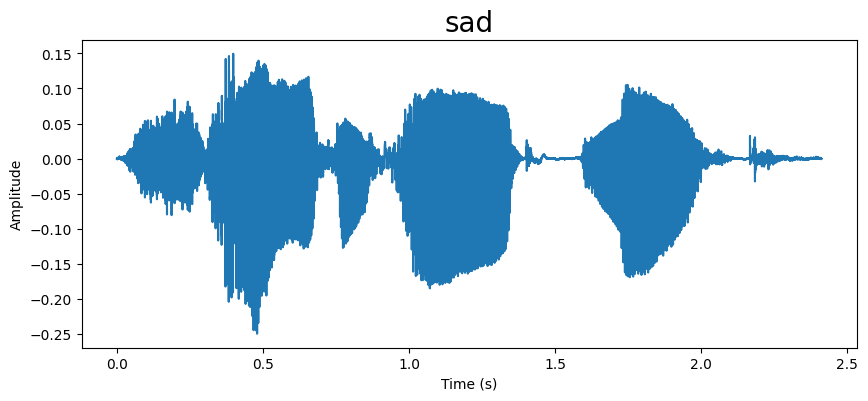

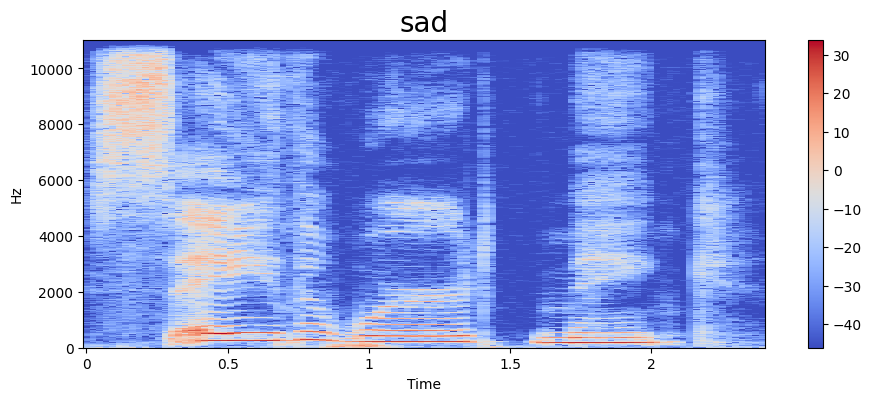

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

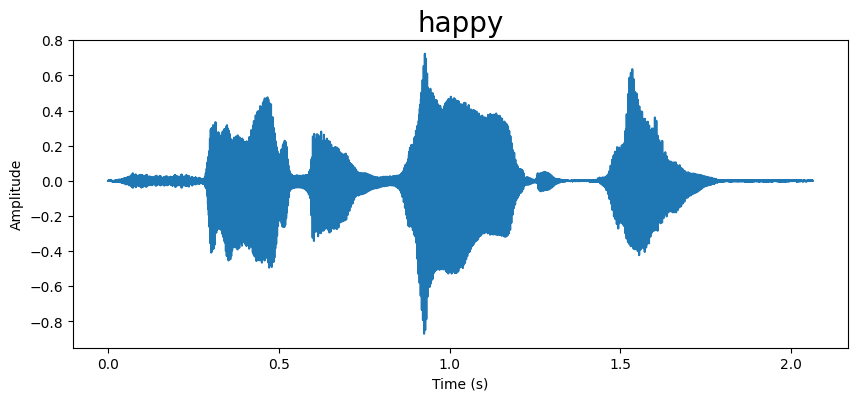

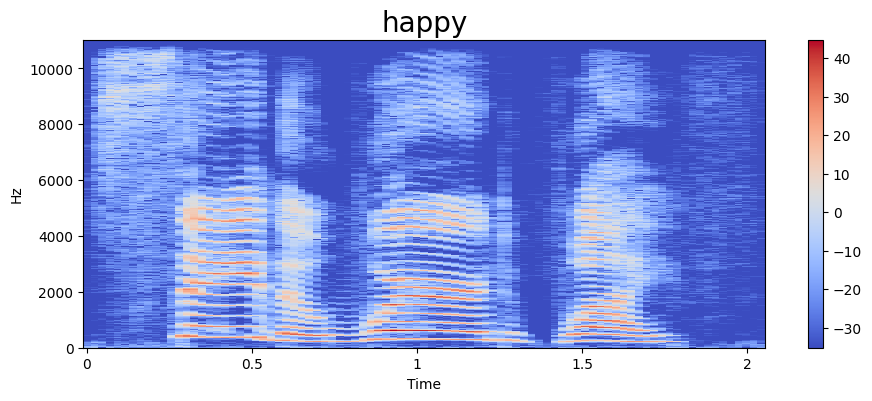

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.51180786e+02,  1.02048294e+02,  2.69270630e+01,  1.22117739e+01,
        1.72746944e+01, -8.62270737e+00, -4.74703074e+00,  3.06957936e+00,
       -2.37280350e+01, -1.30311069e+01, -1.90544224e+01, -1.30710583e+01,
       -6.85248804e+00, -2.14052558e+00, -1.17191696e+00, -5.47938943e-01,
       -8.34716702e+00,  6.20912600e+00,  8.62692535e-01,  3.34856415e+00,
        2.16456000e-02,  3.58268857e+00, -2.78831601e+00, -1.06497896e+00,
        3.03637624e-01,  2.84512806e+00, -7.25878620e+00,  3.70610499e+00,
       -4.54884005e+00,  3.24274254e+00, -3.99890447e+00, -3.41284943e+00,
       -9.44613338e-01, -8.38181555e-01,  5.22176456e+00,  1.33904715e+01,
        1.32900696e+01,  1.80151062e+01,  1.51833334e+01,  1.47473345e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-451.1808, 102.048294, 26.927063, 12.211774, ...
1       [-459.86835, 98.88178, 14.596066, -4.350141, 5...
2       [-486.9698, 151.24261, 2.662233, -37.884678, -...
3       [-496.60577, 116.5392, 10.210691, -23.39369, 2...
4       [-511.70703, 123.78299, -2.1222289, -10.923654...
                              ...                        
5595    [-387.18848, 49.226753, -15.662877, 14.131284,...
5596    [-342.9861, 94.82616, -24.713985, -26.03091, -...
5597    [-377.62958, 64.73256, -11.203283, 17.219797, ...
5598    [-324.39423, 81.36429, -28.964844, -1.5081326,...
5599    [-353.1474, 101.68391, -14.175898, -12.037376,...
Name: speech, Length: 5600, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5600, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

Creating the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import load_model  # Import the model library

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

# Save the trained model to a file
model.save('speech_emotion_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
audio_file_path = '/content/Recording (18).m4a'

Testing the Data with saved model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import load_model
loaded_model = load_model('speech_emotion_model.h5')
def preprocess_audio(audio_file):
    data, sampling_rate = librosa.load(audio_file, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
    return mfcc


emotion_labels = ['anger', 'happiness', 'fear', 'disgust', 'pleasant surprise', 'sadness', 'neutral']

input_features = preprocess_audio(audio_file_path)
input_features = np.expand_dims(input_features, axis=0)

predictions = loaded_model.predict(input_features)

predicted_emotion_index = np.argmax(predictions, axis=1)
predicted_emotion = emotion_labels[predicted_emotion_index[0]]

print("Predicted Emotion for the Audio File:", predicted_emotion)

OSError: No file or directory found at speech_emotion_model.h5